# Van der Pol

Here we cover a true classic from the world of dynamical systems. The *Van der Pol* system!

You can also find this example as a single file in the [GitHub repository](https://github.com/milanofthe/pathsim/blob/master/examples/examples_odes/example_vanderpol.py).

It is described by the following 2nd order ODE

$$\ddot{x} + \mu (x^2 - 1) \dot{x} + x = 0$$

$$\begin{eqnarray}
    \dot{x}_1 =& x_2 \\
    \dot{x}_2 =& \mu (1 - x_1^2) x_2 - x_1
\end{eqnarray}$$

As a block diagram it would look like this:

And translated to PathSim like this:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Apply PathSim docs matplotlib style for consistent, theme-friendly figures
plt.style.use('../pathsim_docs.mplstyle')

from pathsim import Simulation, Connection
from pathsim.blocks import Scope, ODE
from pathsim.solvers import GEAR52A # <- implicit solver for stiff systems

# Initial condition
x0 = np.array([2, 0])

# Van der Pol parameter
mu = 1000 # <- this is very stiff

def func(x, u, t):
    return np.array([x[1], mu*(1 - x[0]**2)*x[1] - x[0]])

# Analytical jacobian (optional)
def jac(x, u, t):
    return np.array([[0, 1], [-mu*2*x[0]*x[1]-1, mu*(1 - x[0]**2)]])

# Blocks that define the system
VDP = ODE(func, x0, jac) # jacobian improves convergence
Sco = Scope(labels=[r"$x_1(t)$"])

blocks = [VDP, Sco]

# The connect the blocks
connections = [
    Connection(VDP, Sco)
]

# Initialize simulation
Sim = Simulation(
    blocks, 
    connections,
    Solver=GEAR52A, 
    tolerance_lte_abs=1e-5, 
    tolerance_lte_rel=1e-3,
    tolerance_fpi=1e-8
)

2025-10-09 16:03:24,566 - INFO - LOGGING enabled
2025-10-09 16:03:24,566 - INFO - SOLVER -> GEAR52A adaptive=True implicit=True
2025-10-09 16:03:24,568 - INFO - ALGEBRAIC PATH LENGTH 1


2025-10-09 16:03:40,610 - INFO - RESET
2025-10-09 16:03:40,611 - INFO - TRANSIENT duration=4000
2025-10-09 16:03:40,611 - INFO - STARTING progress tracker
2025-10-09 16:03:40,654 - INFO - progress=0%
2025-10-09 16:03:40,662 - INFO - progress=11%
2025-10-09 16:03:40,706 - INFO - progress=20%
2025-10-09 16:03:40,766 - INFO - progress=35%
2025-10-09 16:03:40,812 - INFO - progress=40%
2025-10-09 16:03:40,873 - INFO - progress=50%
2025-10-09 16:03:40,913 - INFO - progress=60%
2025-10-09 16:03:40,971 - INFO - progress=74%
2025-10-09 16:03:41,006 - INFO - progress=80%
2025-10-09 16:03:41,066 - INFO - progress=94%
2025-10-09 16:03:41,093 - INFO - progress=100%
2025-10-09 16:03:41,093 - INFO - FINISHED steps(total)=558(806) runtime=482.01ms


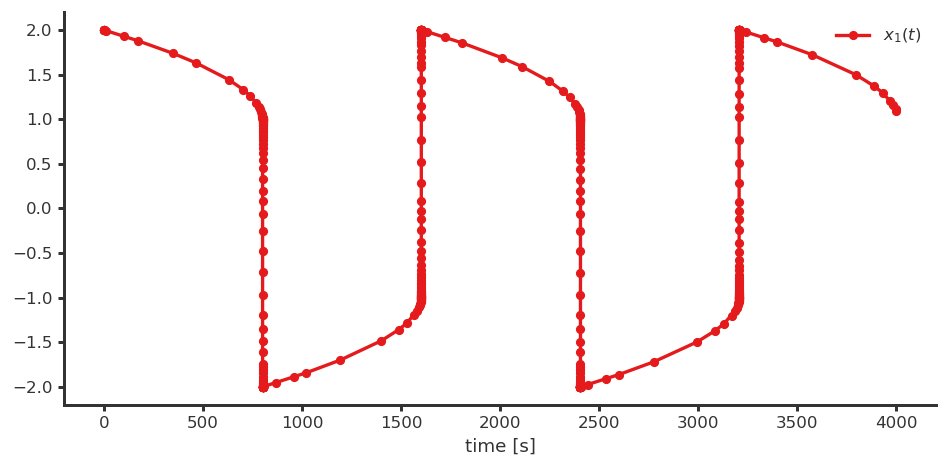

TypeError: cannot unpack non-iterable NoneType object

In [5]:
# Run it
Sim.run(4*mu)

# Plotting
fig, ax = Sco.plot(".-")
plt.show()